In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Adding The Libraries Necessary


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


Uploading the Dataset of Housing Purchases and Prices

In [4]:
# Read the uploaded file into a DataFrame
df = pd.read_csv('housing.csv')

Displaying Dataset Info

In [24]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

Find the Missing Values

In [6]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Filling Values With Median

In [8]:
# Handling missing values (fill with median)
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


<ipython-input-8-59a020561bd1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


Assinging  the both Variables

In [10]:
# Select features and target variable
X = df.drop(columns=['median_house_value'])  # Independent variables
y = df['median_house_value' ]               #Targeted Variable

Identifiying The Numeric And Other Categories Columns

In [18]:
# Identifying numerical & categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = ['ocean_proximity']

**Transformation** Scaling Numerical Values And Applying Hot Encoding to convert the Categories Names into the Binary Format i.e 0 & 1

In [25]:
# Scaling for numerical, One-Hot Encoding for categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),  # Scale numerical features
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_features)  # One-hot encode categorical
])

**Piplining** Preapres to Scale the Numerical Fetures And After Preprocessing the Model Linear Regression will be trained

In [20]:
# Created a pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Spliting data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Training the model
pipeline.fit(X_train, y_train)

# Predicting on test data
y_pred = pipeline.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Showing the Model Performance

In [26]:
print("\n📊 Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


📊 Model Performance:
Mean Squared Error (MSE): 4908476721.16
R-squared Score (R²): 0.6254


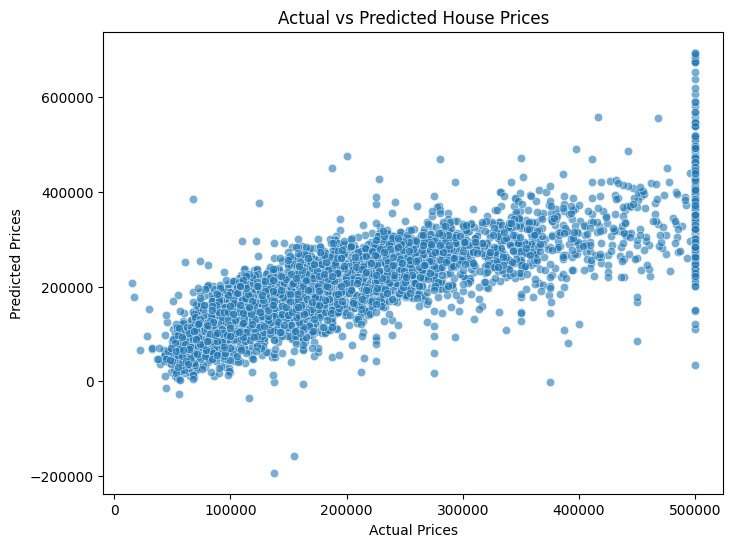

In [23]:
# Visualization (Actual vs Predicted Prices)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()